# 1. Load libraries and read the data¶


# 1.1. Load libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection  import  train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,precision_score, recall_score, roc_curve, precision_recall_curve 
import itertools
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1.2. Read the data

In [3]:
df = pd.read_csv('/content/data (1).csv')

# 1.3. Missing Values 

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# 1.4. Reassign target and drop useless features

In [5]:
# Drop Useless column
df.drop(['Unnamed: 32','id'], axis =1, inplace = True)

In [6]:
# Reassign target
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

# 2 Exploratory Data Analysis (EDA)

# 2.1  Head and Describe

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# 3.   **Functions**

In [11]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [12]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

# 4.  **Prepare Dataset** 

# 4.1. Define (X, y) 

In [13]:
y = df.diagnosis
X = df.drop('diagnosis', axis=1)
z = X

# 4.2. Standard scaler (X)

In [14]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4.3. Train_test split

In [15]:
# Train_test split
SEED = 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = SEED)

# 5. **Trees** 

# 5.1. DescisionTreeClassifier 

In [16]:

dtc = DecisionTreeClassifier( max_depth=4,min_samples_leaf=0.14, random_state=SEED)



dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

In [17]:
# accuracy_score(X_train,y_train)

In [18]:
accuracy_score(y_test, y_pred)

0.8888888888888888

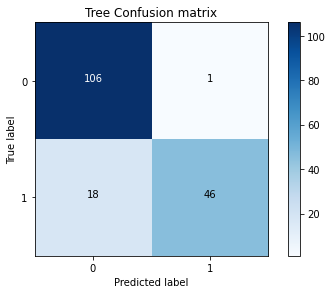

Accuracy  =     0.889
Precision =     0.979
Recall    =     0.719
F1_score  =     0.829


In [19]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('3')
plt.show()

show_metrics()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       107
           1       0.98      0.72      0.83        64

    accuracy                           0.89       171
   macro avg       0.92      0.85      0.87       171
weighted avg       0.90      0.89      0.88       171



# Cross-Validation

In [21]:
SEED =113
dt = DecisionTreeClassifier( max_depth=4,min_samples_leaf=0.14,random_state=SEED)

In [22]:
cv_C = cross_val_score(dt,X_train, y_train, cv=10,scoring ='accuracy', n_jobs=-1)

In [23]:
# various scores
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [24]:
# Fit 'dt' to the training set          
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.14, random_state=113)

In [25]:
# Predict the labels of training set
y_predict_train = dt.predict(X_train)

In [26]:
# Predict the labels of test set
y_predict_test = dt.predict(X_test)

In [27]:
#CV accuracy
print('CV accuracy:{:.2f}'.format(cv_C.mean()))

CV accuracy:0.89


In [28]:
#train set accuracy
print('Train sccuracy:{:.2f}'.format(accuracy_score(y_train, y_predict_train)))

Train sccuracy:0.93


In [29]:
#test set accuracy
print('Test accuracy:{:.2f}'.format(accuracy_score(y_test, y_predict_test)))

Test accuracy:0.89


# 5.2. Bagging

In [30]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier( max_depth=4,min_samples_leaf=0.14,random_state=1)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator =dt, n_estimators=300, n_jobs=-1)
# fit bc to Train set
bc.fit(X_train, y_train)
# predict 
y_pred = bc.predict(X_test)



In [31]:
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of bagging Classifier:{:.3f}'.format(accuracy))


Accuracy of bagging Classifier:0.936


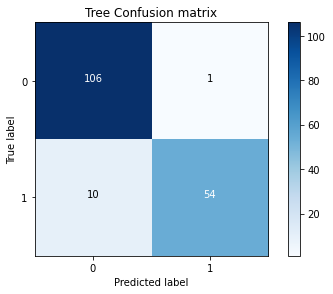

Accuracy  =     0.936
Precision =     0.982
Recall    =     0.844
F1_score  =     0.908


In [32]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('4')
plt.show()

show_metrics()

# 5.2. Out-of-bag (OOB)

In [33]:
# Instantiate a BaggingClassifier 'oob_c'; set oob_score= True
oob_c = BaggingClassifier(base_estimator = dt, n_estimators=300, oob_score=True, n_jobs=-1)

# fit bc to Train set
oob_c.fit(X_train, y_train)

# predict
y_pred = oob_c.predict(X_test)

In [34]:
# Evaluate test set accuracy
accuracy = accuracy_score(y_test, y_pred)
# oob_accuracy
oob_accuracy = oob_c.oob_score_
# Print test set accuracy                          
print('test accuracy :{:.3f}'.format(accuracy))
# Print OOB accuracy
print('oob accuracy :{:.3f}'.format( oob_accuracy))

test accuracy :0.924
oob accuracy :0.930


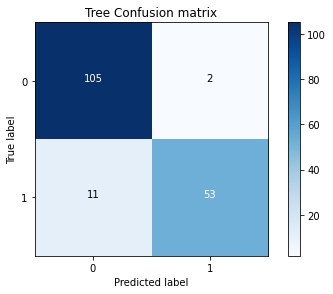

Accuracy  =     0.924
Precision =     0.964
Recall    =     0.828
F1_score  =     0.891


In [35]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('5')
plt.show()

show_metrics()

# 6.  **RandomForest**

# 6.1. RandomForest

In [36]:
# RandomForest
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

In [37]:
#fit bc to Train set
rf.fit(X_train, y_train)
#predict
y_pred = rf.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
                          
print('test accuracy :{:.3f}'.format(accuracy))

test accuracy :0.942


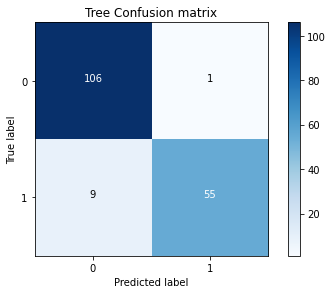

Accuracy  =     0.942
Precision =     0.982
Recall    =     0.859
F1_score  =     0.917


In [39]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

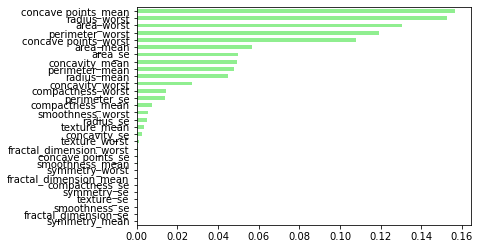

In [40]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = z.columns)
# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()   
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

# 6.2. Adaboost

In [41]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

In [42]:
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=113),
                   n_estimators=100)

In [43]:
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)


In [44]:
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.99


# 6.3 Gradient Boosting 

In [45]:
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=SEED)

In [46]:
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)

In [47]:
accuray = accuracy_score(y_test, y_pred)
print('test accuracy: {:.3f}'.format(accuracy))

test accuracy: 0.942


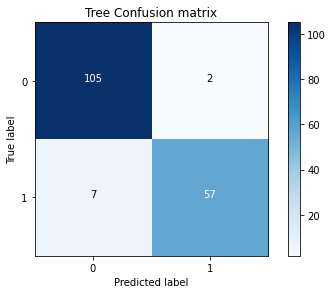

Accuracy  =     0.947
Precision =     0.966
Recall    =     0.891
F1_score  =     0.927


In [48]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('7')
plt.show()

show_metrics()

# Stochastic Gradient Boosting

In [49]:
# Instantiate a stochastic GradientBoostingClassifier 'sgbt'
sgbt = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = sgbt.predict(X_test)


In [50]:
accuray = accuracy_score(y_test, y_pred)
print('test accuracy: {:.3f}'.format(accuracy))

test accuracy: 0.942


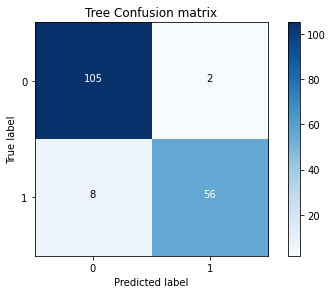

Accuracy  =     0.942
Precision =     0.966
Recall    =     0.875
F1_score  =     0.918


In [51]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('8')
plt.show()

show_metrics()

# 7. **Hyperparameter Tunig using GridSearchCV**

# 7.2. GridSearchCV for Tree

In [52]:
dt = DecisionTreeClassifier(random_state= SEED)
params_dt = { 
             'max_depth': [3, 4, 5, 6, 7, 8],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4, 0.6, 0.8]
            }
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring='accuracy',cv=10,n_jobs=-1 )
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=113),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [53]:
# Extract best hyperparameters from 'griddt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.04}


In [54]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

Best CV accuracy


In [55]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.936


# 7.3. GridSearchCV for Forest

In [56]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

In [57]:
grid_rf = GridSearchCV(estimator =clf, param_grid=param_grid, scoring = 'recall', cv=10,n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 15, 25],
                         'max_features': [3, 5, 10, 20],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 300]},
             scoring='recall')

In [58]:
# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.942


In [59]:
best_parameters = grid_rf.best_params_
print('The best parameters for using this model is', best_parameters)

The best parameters for using this model is {'max_depth': 5, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 300}


In [60]:
CV_rfc = RandomForestClassifier(max_depth = best_parameters['max_depth'], max_features = best_parameters['max_features'], min_samples_split = best_parameters['min_samples_split'] , 
                               n_estimators =best_parameters['n_estimators'] )

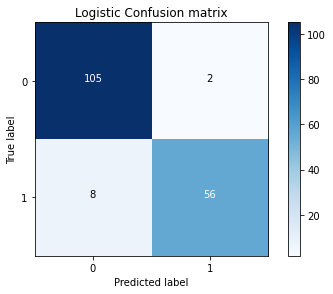

Accuracy  =     0.942
Precision =     0.966
Recall    =     0.875
F1_score  =     0.918


In [61]:
CV_rfc.fit(X_train, y_train)
y_pred = CV_rfc.predict(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('9')
plt.show()

show_metrics()

# Recall for various Decision Threshold

Recall w/ threshold = 0.1 : 0.96875
Recall w/ threshold = 0.2 : 0.9375
Recall w/ threshold = 0.3 : 0.921875
Recall w/ threshold = 0.4 : 0.875
Recall w/ threshold = 0.5 : 0.875
Recall w/ threshold = 0.6 : 0.859375
Recall w/ threshold = 0.7 : 0.84375
Recall w/ threshold = 0.8 : 0.796875
Recall w/ threshold = 0.9 : 0.671875


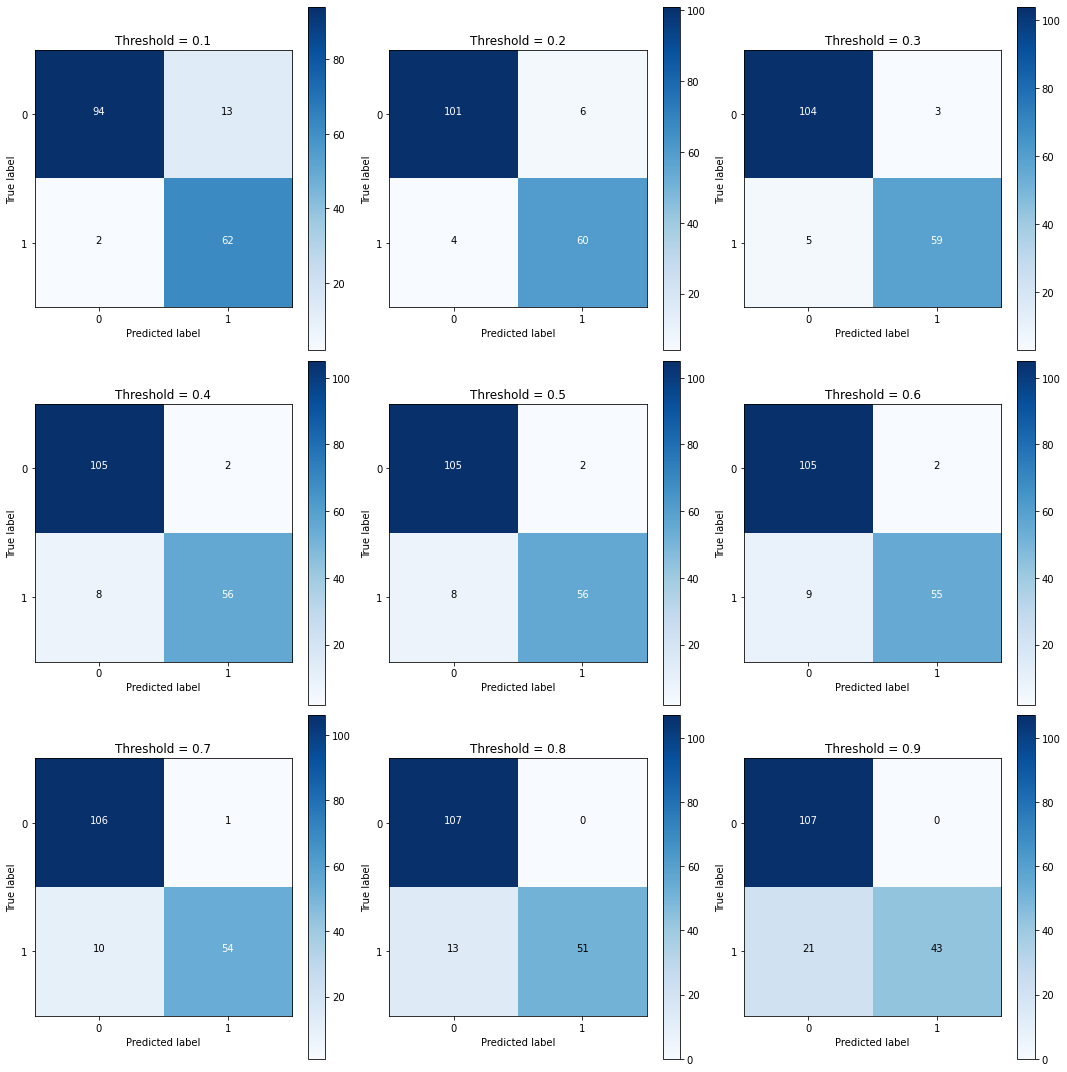

In [62]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = CV_rfc.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

In [63]:
# Recall = 1.
y_score = CV_rfc.predict_proba(X_test)[:,1] > 0.13
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
show_metrics()

Accuracy  =     0.936
Precision =     0.873
Recall    =     0.969
F1_score  =     0.919
